In [58]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
from scipy import stats
import matplotlib.pyplot as plt

import sklearn.preprocessing

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import RidgeClassifier, LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [59]:
# we will substract 3000 rows on beginning
data = pd.read_csv("atp.csv")
Y = pd.DataFrame(data['target'][3000:]).reset_index(drop=True)
X = data.drop(['target'], axis = 1)[3000:].reset_index(drop=True)
# we will substract 3000 rows on beginning
data_reduced = pd.read_csv("atp_reduced.csv")
Y_reduced = pd.DataFrame(data_reduced['target'][3000:]).reset_index(drop=True)
X_reduced = data_reduced.drop(['target'], axis = 1)[3000:].reset_index(drop=True)

In [60]:
X

,age_0,ht_0,hand_0,rank_0,rank_points_0,wins_semester_level1_0,wins_semester_level2_0,wins_semester_level3_0,wins_year_level1_0,wins_year_level2_0,...,percent_career_Grass_1,percent_hth_wins_year_1,percent_hth_wins_career_1,percent_tournament.1,surface,best_of,match_rank,year,sin_day,cos_day
0,23.923340,185.0,1,70.0,498.0,0,1,4,0,1,...,0.000000,0.0,0.0,0.000000,0.0,3,0.0225,1992,0.103102,0.994671
1,27.674196,180.0,1,18.0,1178.0,0,0,4,0,6,...,0.500000,0.0,0.0,0.500000,0.0,3,0.0225,1992,0.103102,0.994671
2,24.481862,188.0,0,134.0,261.0,1,2,2,1,2,...,0.727273,0.0,0.0,0.000000,0.0,3,0.0225,1992,0.103102,0.994671
3,23.928816,178.0,1,32.0,833.0,0,2,6,0,5,...,0.250000,0.0,0.0,0.000000,0.0,3,0.0225,1992,0.103102,0.994671
4,24.845996,188.0,0,23.0,973.0,0,4,14,0,5,...,0.000000,0.0,0.0,0.000000,0.0,3,0.0225,1992,0.103102,0.994671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75765,24.624230,196.0,1,35.0,1433.0,0,1,6,0,6,...,0.000000,0.0,0.0,0.777778,0.0,3,0.1500,2022,0.508671,0.860961
75766,24.783025,198.0,1,3.0,7780.0,4,11,7,8,20,...,0.333333,0.0,0.0,0.666667,0.0,3,0.1500,2022,0.508671,0.860961
75767,25.809719,183.0,1,163.0,410.0,0,1,2,0,1,...,0.357143,0.0,1.0,1.000000,0.0,3,0.1500,2022,0.508671,0.860961
75768,24.624230,196.0,1,35.0,1433.0,0,2,6,0,7,...,0.625000,0.0,0.0,0.888889,0.0,3,0.2500,2022,0.508671,0.860961


In [61]:
X_reduced

,age_0,ht_0,hand_0,rank_0,rank_points_0,wins_semester_level1_0,wins_semester_level2_0,wins_semester_level3_0,wins_year_level1_0,wins_year_level2_0,...,percent_career_Grass_1,percent_hth_wins_year_1,percent_hth_wins_career_1,percent_tournament.1,surface,best_of,match_rank,year,sin_day,cos_day
0,24.238193,180.0,0,65.0,597.0,1,3,6,1,4,...,0.666667,0.0,0.0,0.000000,1.0,3,0.0225,1993,0.711657,0.702527
1,26.321697,188.0,1,77.0,518.0,0,0,9,0,0,...,0.400000,1.0,1.0,0.000000,1.0,3,0.0225,1993,0.711657,0.702527
2,29.497604,183.0,1,45.0,724.0,1,3,6,1,4,...,0.333333,0.0,0.0,0.714286,1.0,3,0.0225,1993,0.711657,0.702527
3,23.671458,188.0,1,35.0,894.0,0,4,11,0,5,...,0.555556,0.0,0.0,0.500000,1.0,3,0.0225,1993,0.711657,0.702527
4,20.161533,183.0,1,67.0,579.0,0,2,6,0,2,...,0.625000,0.0,0.0,1.000000,1.0,3,0.0225,1993,0.711657,0.702527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59146,24.624230,196.0,1,35.0,1433.0,0,1,6,0,6,...,0.000000,0.0,0.0,0.777778,0.0,3,0.1500,2022,0.508671,0.860961
59147,24.783025,198.0,1,3.0,7780.0,4,11,7,8,20,...,0.333333,0.0,0.0,0.666667,0.0,3,0.1500,2022,0.508671,0.860961
59148,25.809719,183.0,1,163.0,410.0,0,1,2,0,1,...,0.357143,0.0,1.0,1.000000,0.0,3,0.1500,2022,0.508671,0.860961
59149,24.624230,196.0,1,35.0,1433.0,0,2,6,0,7,...,0.625000,0.0,0.0,0.888889,0.0,3,0.2500,2022,0.508671,0.860961


## naive classifier using ranking points

In [62]:
def naive_classifier(column, data, Y):
    acc = 0
    for ind in data.index:
        r0 = data.at[ind, f'{column}_0']
        r1 = data.at[ind, f'{column}_1']
        if r0 > r1 and Y.at[ind, 'target'] == 0:
            acc += 1
        if r0 < r1 and Y.at[ind, 'target'] == 1:
            acc += 1
    return acc/len(data)

In [63]:
print("accuracy: ", naive_classifier('rank_points', X, Y))
print("accuracy: ", naive_classifier('rank_points', X_reduced, Y_reduced))

accuracy:  0.6475254058334433
accuracy:  0.6424743453196058


## naive classifier using elo points

In [64]:
print("accuracy: ", naive_classifier('elo', X, Y))
print("accuracy: ", naive_classifier('elo', X_reduced, Y_reduced))

accuracy:  0.6587699617262769
accuracy:  0.6584165948166557


## so far our best results are: elo: 0.658 , rank: 0.647

## dealing with nulls (after update we do not have any nulls)

In [65]:
# we replace Nans with random gaussian data
def generate_data_on_Nan(column, data):
    m = data[column].mean()
    std = data[column].std()
    #print(m, std)
    for ind in data.index:
        if np.isnan(data.at[ind, column]):
            data.at[ind, column] = np.random.normal(m, std)

In [66]:
# check where are Nans, and how many
for c in X.columns:
    if X[c].isna().sum() > 0:
        print(c, X[c].isna().sum())

In [67]:
# check where are Nans and replace them with gaussian random
#for c in X.columns:
#    if X[c].isna().sum() > 0:
#            generate_data_on_Nan(c, X)

### Features importance

In [68]:
corr_with_target = []
for cname in data.columns:
    #print(f"{cname.ljust(25)}:\t {data['target'].corr(data[cname]).round(decimals=3)}")
    corr_with_target.append((abs(data['target'].corr(data[cname])), cname))

In [69]:
corr_with_target_reduced = []
for cname in data.columns:
    #print(f"{cname.ljust(25)}:\t {data['target'].corr(data[cname]).round(decimals=3)}")
    corr_with_target_reduced.append((abs(data_reduced['target'].corr(data_reduced[cname])), cname))

Text(0.5, 1.05, 'Correlation Matrix')

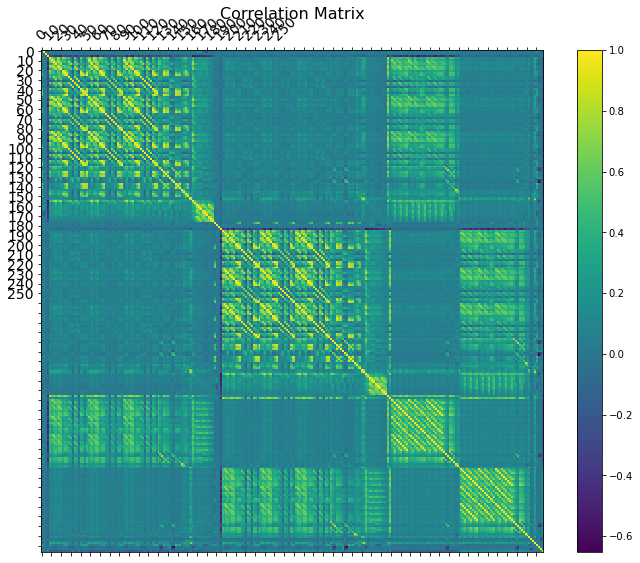

In [74]:
f = plt.figure(figsize=(12,9))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(0, data.columns.shape[0], 5), range(0, data.columns.shape[0], 10), fontsize=14, rotation=45)
plt.yticks(range(0, data.columns.shape[0], 5), range(0, data.columns.shape[0], 10), fontsize=14)
cb = plt.colorbar()
plt.title('Correlation Matrix', fontsize=16)

In [71]:
#for corr in sorted(corr_with_target)[:-50:-1]:
#    print(f"{corr[1].ljust(25)}:\t {corr[0].round(decimals=3)}")

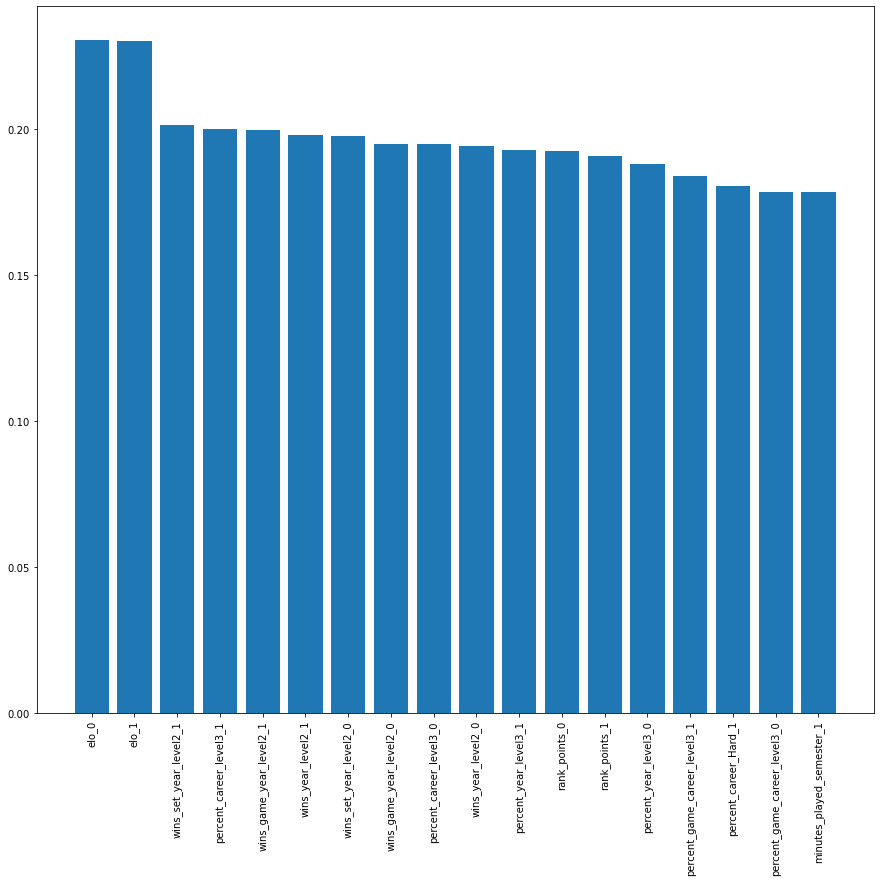

In [72]:
plt.figure(figsize=(15,13))
plt.bar([x[1] for x in sorted(corr_with_target)[-2:-20:-1]],
        [x[0] for x in sorted(corr_with_target)[-2:-20:-1]]
       )
plt.xticks(rotation=90)
plt.show()

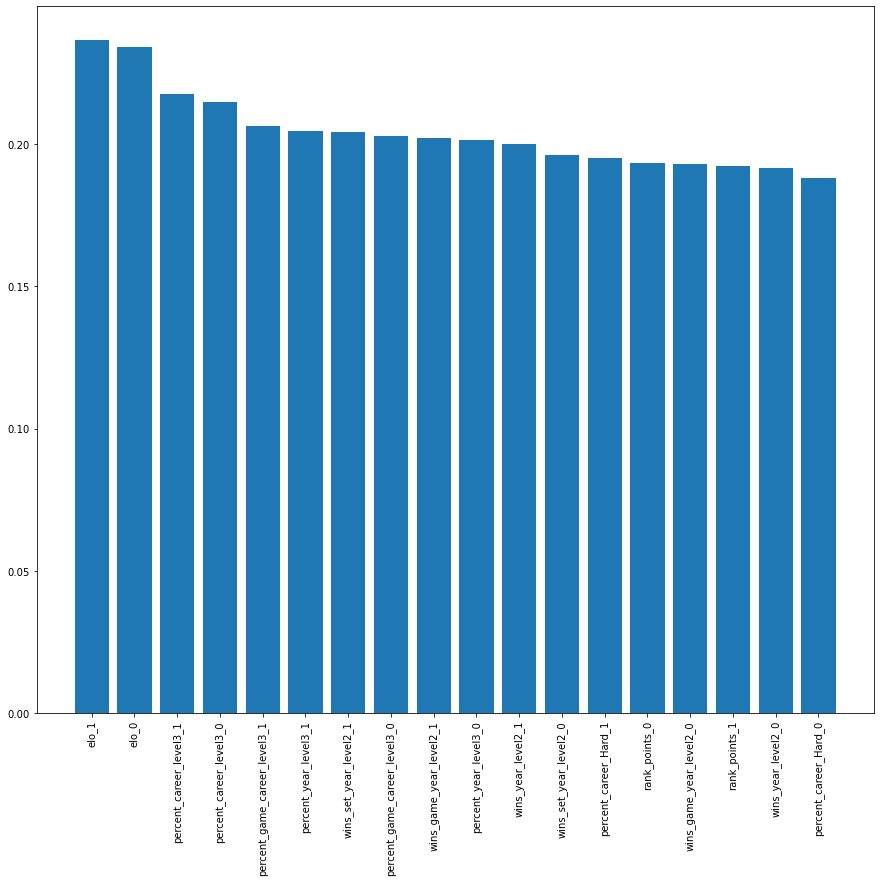

In [75]:
plt.figure(figsize=(15,13))
plt.bar([x[1] for x in sorted(corr_with_target_reduced)[-2:-20:-1]],
        [x[0] for x in sorted(corr_with_target_reduced)[-2:-20:-1]]
       )
plt.xticks(rotation=90)
plt.show()

### PCA

In [76]:
X_std = pd.DataFrame(sklearn.preprocessing.StandardScaler().fit_transform(X), columns = X.columns)
y = np.asarray(Y).ravel()
xx = np.random.choice(X_std.shape[0], 500)
new_x = X_std.iloc[xx]
new_y = Y.iloc[xx].reset_index(drop=True)
pca_x = PCA(n_components=2)
X_comp = pca_x.fit_transform(new_x)
princ_comp_X = pd.DataFrame(X_comp, columns=['0','1'])

In [77]:
print('Explained variation per principal component: {}'.format(pca_x.explained_variance_ratio_))

Explained variation per principal component: [0.18309101 0.13944005]


<Figure size 432x288 with 0 Axes>

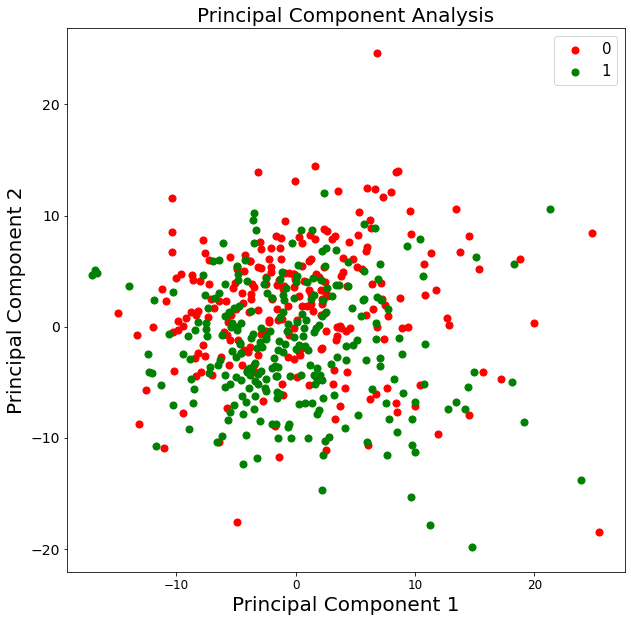

In [78]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
plt.title("Principal Component Analysis",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indices = new_y['target'] == target
    plt.scatter(princ_comp_X.loc[indices, '0']
               , princ_comp_X.loc[indices, '1'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.show()

In [79]:
model = XGBClassifier(use_label_encoder=False).fit(X_std,y, eval_metric='rmse')
importances = model.feature_importances_

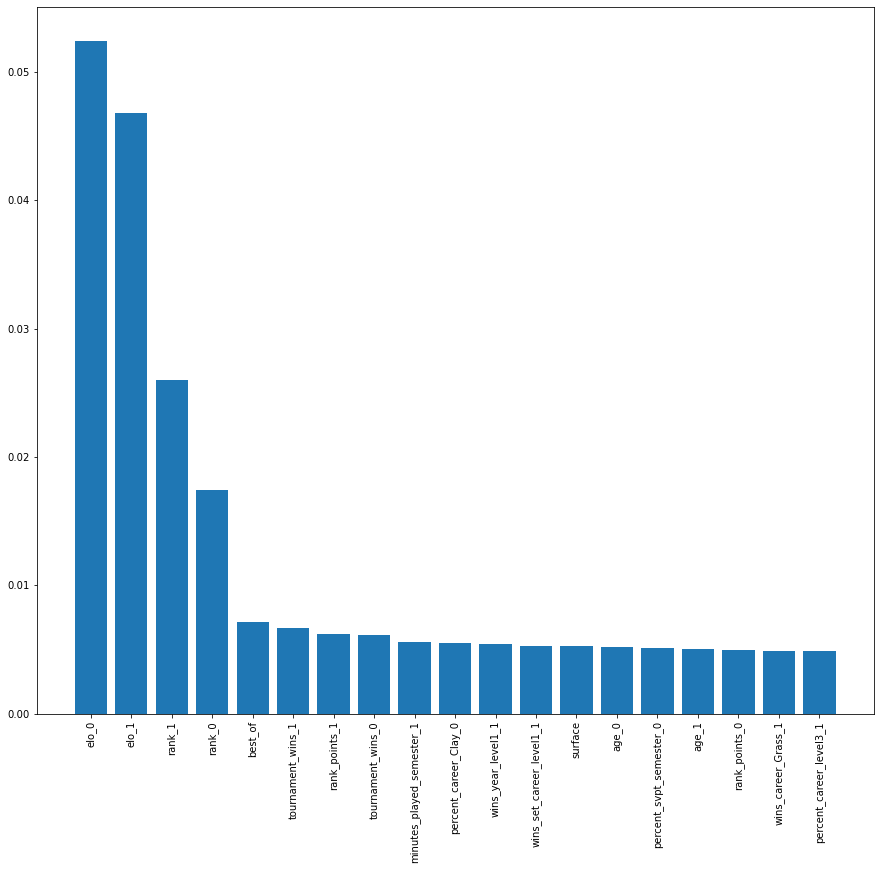

In [80]:
importance = []
for i in range(len(importances)):
    importance.append((importances[i], X_std.columns[i]))
plt.figure(figsize=(15,13))
plt.bar([x[1] for x in sorted(importance)[:-20:-1]],
        [x[0] for x in sorted(importance)[:-20:-1]]
       )
plt.xticks(rotation=90)
plt.show()

In [81]:
X_std_reduced = pd.DataFrame(sklearn.preprocessing.StandardScaler().fit_transform(X_reduced), columns = X_reduced.columns)
y_reduced = np.asarray(Y_reduced).ravel()
model = XGBClassifier(use_label_encoder=False).fit(X_std_reduced,y_reduced, eval_metric='rmse')
importances_reduced = model.feature_importances_

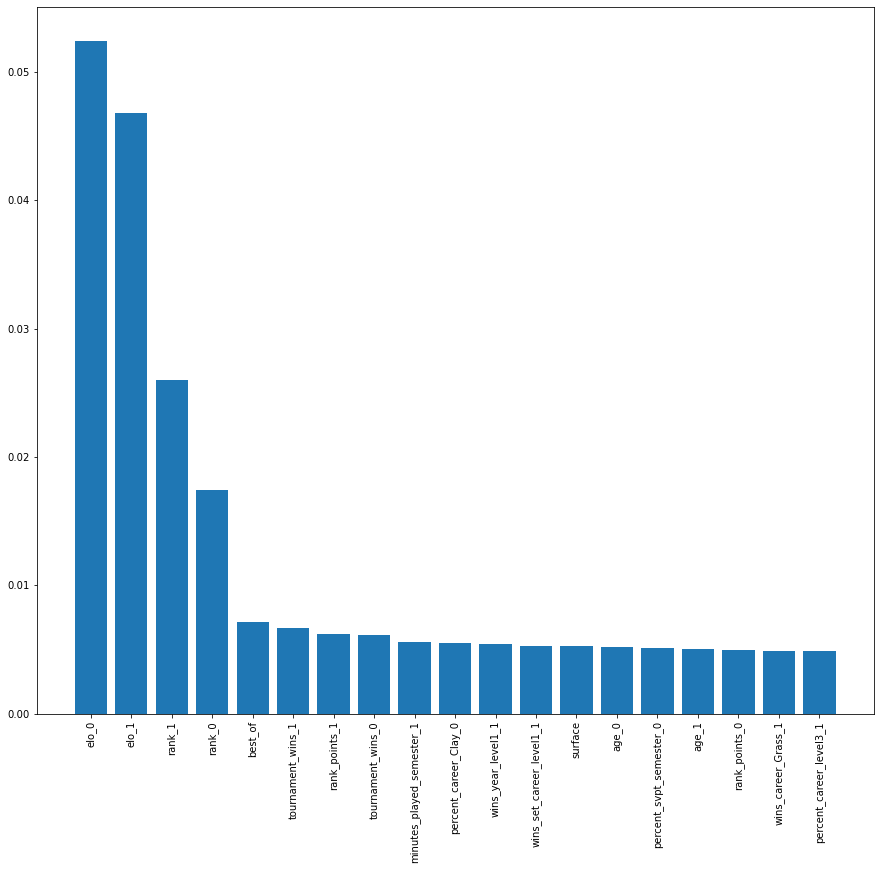

In [82]:
importance = []
for i in range(len(importances_reduced)):
    importance.append((importances[i], X_std_reduced.columns[i]))
plt.figure(figsize=(15,13))
plt.bar([x[1] for x in sorted(importance)[:-20:-1]],
        [x[0] for x in sorted(importance)[:-20:-1]]
       )
plt.xticks(rotation=90)
plt.show()

In [83]:
def win_to_feature(data, column, target, freq=20):
    x_max = max(data[column])
    x_min = min(data[column])
    column_groups = np.linspace(x_min,x_max,num=freq)
    win_ratio = [data.loc[(data[column]>=column_groups[i]) & (Y['target']==target)
                               & (data[column]<column_groups[i+1]) ].shape[0] /
                               data.loc[ (data[column]>= column_groups[i])
                                           & (data[column]< column_groups[i+1])].shape[0] for i in range(0,freq-1)]
    plt.figure(figsize=(10,7))
    plt.plot(column_groups[0:freq - 1],win_ratio)
    plt.ylabel('win_ratio')
    plt.xlabel(column)
    plt.show()

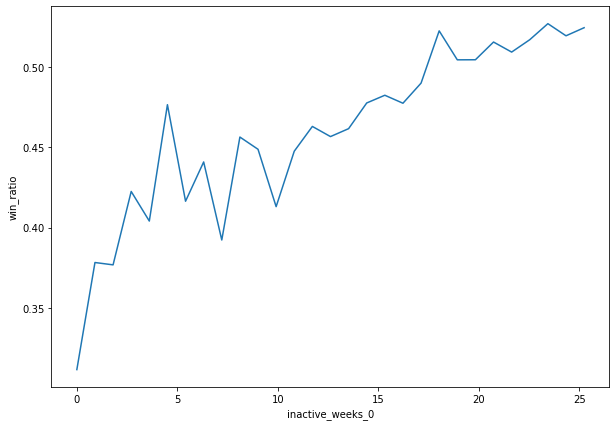

In [84]:
win_to_feature(X, "inactive_weeks_0", 0, freq=30)

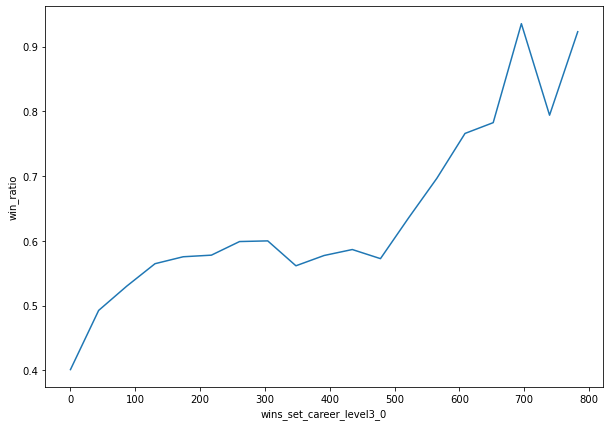

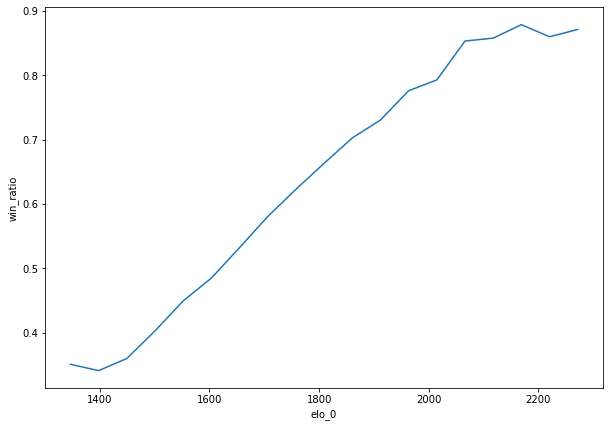

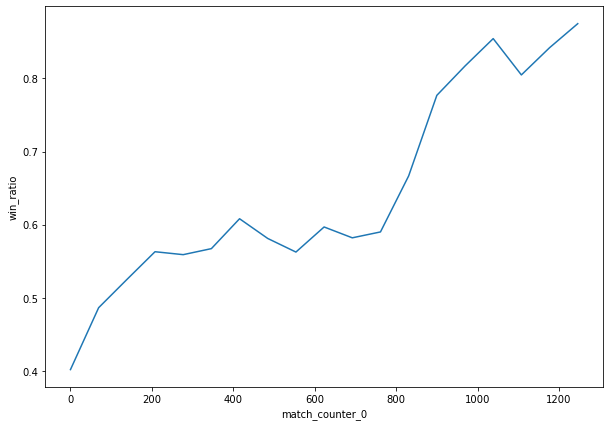

In [85]:
win_to_feature(X, "wins_set_career_level3_0", 0)
win_to_feature(X, "elo_0", 0)
win_to_feature(X, "match_counter_0", 0)